In [99]:
#Dependencies
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
import numpy as np

In [100]:
#import splinter and BS4
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

In [101]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [102]:
# Visit the Mars Temperature Data site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [103]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [104]:
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [105]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [106]:
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [107]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


<AxesSubplot:xlabel='terrestrial_date'>

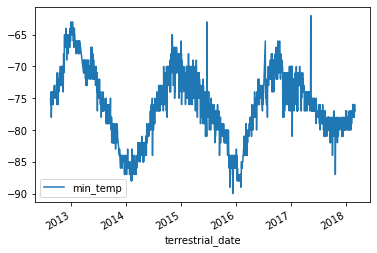

In [108]:
#How many months exist on Mars?

# plot date by minimum temp
mars_df.plot(x="terrestrial_date", y ="min_temp")

# There is approximately 24 months on Mars based on the temperature cycle below. 
# This can be seeing based on the difference between peaks and lows.
# There is a approx. 24 months difference between 2013 and 2015 peaks, as well as approx. 24 months between 2015 and 2017 peaks (visually)

In [109]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
# Lets count the number of rows in the dataset leading to the number of Earth Days recorded
count_row = len(mars_df.index)
count_row



1867

In [110]:
# there is 1867 days worth of data based on Earth timeframe. 
# If Mars takes 24 months for one cycle around the sun and Earth takes 12 months.
# We can assume there is half of 1867 days martian worth of days in the scraped data set hence, 1867/2 = 933.5 days.
# We can assume there is approximately 934 days worth of data
Martian_worth_days = 1867/2
Martian_worth_days


933.5

In [116]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
# Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
# group the dates by months and do minimum average
monthly_terrestrial_date_temp = mars_df.groupby(mars_df.terrestrial_date.dt.month)['min_temp'].mean()
temp_df = pd.DataFrame(monthly_terrestrial_date_temp)
temp_df.reset_index(inplace=True)
temp_df

,terrestrial_date,min_temp
0,1,-76.988506
1,2,-76.909091
2,3,-77.349206
3,4,-76.098592
4,5,-75.573427
5,6,-75.671233
6,7,-76.177305
7,8,-75.851613
8,9,-75.816092
9,10,-75.685083


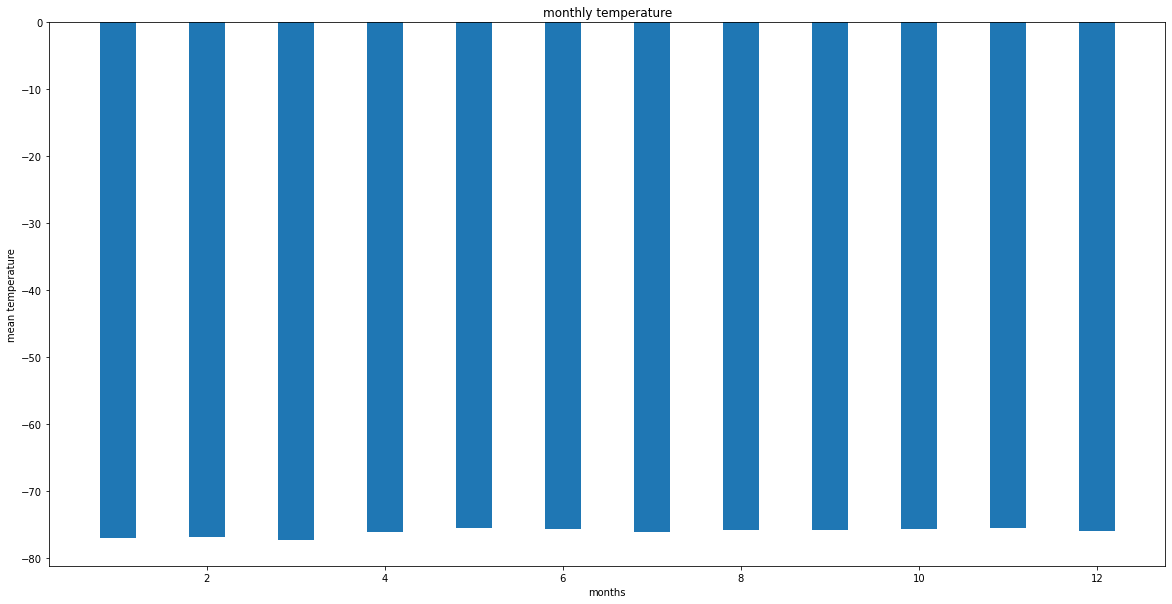

In [122]:
# plot date by minimum temp by month
months = temp_df["terrestrial_date"]
temp = temp_df['min_temp']
fig = plt.figure(figsize = (20, 10))
# creating the bar plot
plt.bar(months, temp,
        width = 0.4)
 
plt.xlabel("months")
plt.ylabel("mean temperature")
plt.title("monthly temperature")
plt.show()

# Based on the bar chart and data set March (relative to Earth) is the coldest month in Mars with an average of -77.35 degrees.
# And November is the warmest month with an average temperature of -75.538 degrees.

In [118]:
# Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? 
# Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
monthly_terrestrial_date_atp = mars_df.groupby(mars_df.terrestrial_date.dt.month)['pressure'].mean()
pressure_df = pd.DataFrame(monthly_terrestrial_date_atp)
pressure_df.reset_index(inplace=True)
pressure_df

,terrestrial_date,pressure
0,1,861.258621
1,2,837.967532
2,3,827.722222
3,4,817.676056
4,5,803.601399
5,6,807.910959
6,7,822.510638
7,8,829.606452
8,9,845.586207
9,10,865.475138


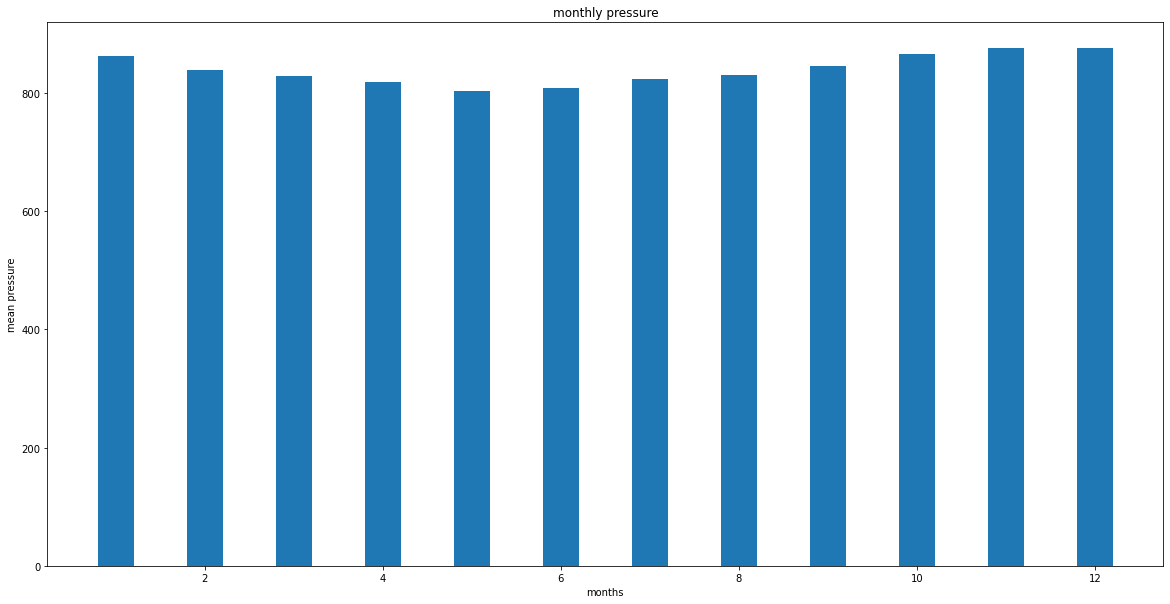

In [123]:
# plot date by minimum temp by month
months = pressure_df["terrestrial_date"]
pressure = pressure_df['pressure']
fig = plt.figure(figsize = (20, 10))
# creating the bar plot
plt.bar(months, pressure ,
        width = 0.4)
 
plt.xlabel("months")
plt.ylabel("mean pressure")
plt.title("monthly pressure")
plt.show()
# Based on the bar chart and data set November has the highest highest atmospheric pressure on Mars (875.48) 
# and May has the lowest atmospheric pressure on Mars (803.60)

<AxesSubplot:xlabel='terrestrial_date'>

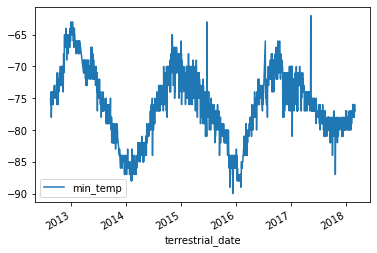

In [124]:
#Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? 
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.
# plot date by minimum temp
mars_df.plot(x="terrestrial_date", y ="min_temp")

# Based on the plot there is approx. 24 months (apx 730 earth days) that exist in a martian year (visually based off the plot below)

In [125]:
#Export the DataFrame to a CSV file
mars_df.to_csv('mars_data_Challenge.csv', index=False)